<a href="https://colab.research.google.com/github/sriramreddy-7/Generative-AI/blob/main/Assign_3%20%7C%7C%20Build%20an%20Artificial%20Neural%20Network%20to%20implement%20a%20regression%20task%20using%20the%20Back-propagation%20%20algorithm%20and%20test%20the%20same%20using%20appropriate%20data%20sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('/content/car data.csv')

In [9]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.shape

(301, 9)

In [14]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [15]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [18]:
print(X,Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='relu'))

In [34]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [35]:
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

In [36]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 47.1667 - mse: 47.1667
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 44.1940 - mse: 44.1940
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 40.7769 - mse: 40.7769
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 37.4884 - mse: 37.4884
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 34.6621 - mse: 34.6621
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 31.3789 - mse: 31.3789
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 28.5054 - mse: 28.5054
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 26.0310 - mse: 26.0310
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 23.0806 - mse: 23.0806
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 20.2997 - mse: 20.2997
Epoch 11/100
9/9 [==============================] - 0s 2ms/

In [38]:
y_pred = model.predict(X_test)
error_score = model.evaluate(X_test, Y_test, verbose=0)
print('Mean Squared Error:', error_score)

1/1 [==============================] - 0s 76ms/step
Mean Squared Error: [0.5907456278800964, 0.5907456278800964]


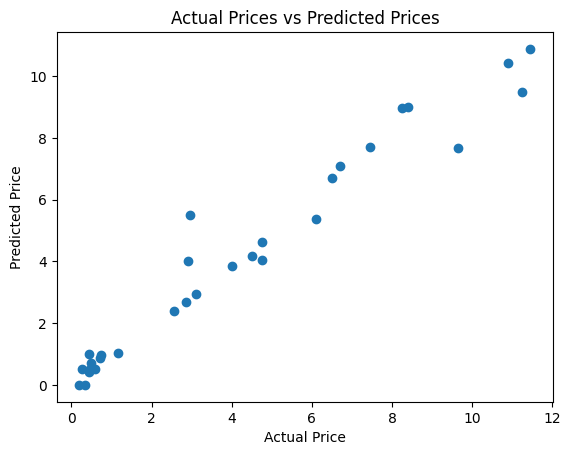

In [39]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()